# WK8 Exploratory Data Analysis <hr style="border:2.5px solid #126782"></hr>

Name: **Fritz Andrew E. Flores** <br>
Course: **CPE2A**

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv(r"raw\chip-dataset-cleaned.csv",
                 delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       4854 non-null   object 
 1   Type          4854 non-null   object 
 2   Date          4854 non-null   object 
 3   Process_Size  4845 non-null   float64
 4   TDP           4854 non-null   float64
 5   Die_Size      4854 non-null   float64
 6   Transistors   4854 non-null   float64
 7   Frequency     4854 non-null   int64  
 8   Foundry       4854 non-null   object 
 9   Vendor        4854 non-null   object 
 10  FP16          536 non-null    float64
 11  FP32          1948 non-null   float64
 12  FP64          1306 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 493.1+ KB


In [52]:
df = df.drop(df.columns[[10,11,12]],axis=1)
df.head()

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD


In [53]:
df_w = df.copy()

# Number of Chips Each Vendor

Text(0, 0.5, 'Number of Chips')

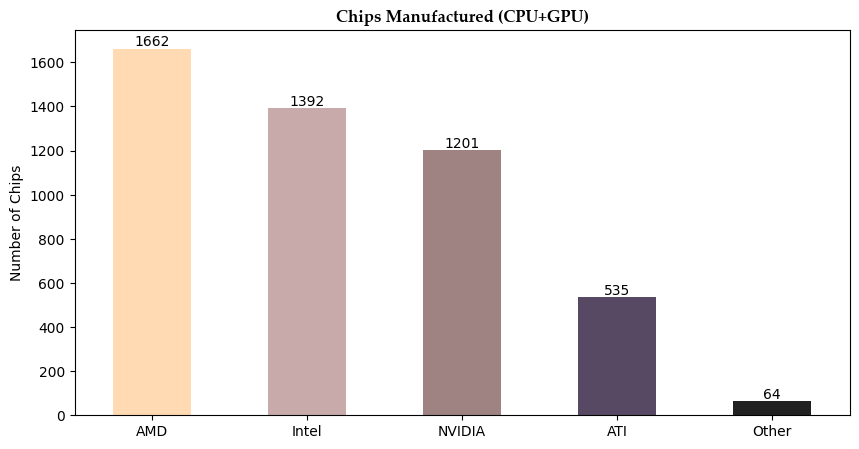

In [54]:
chip_count = df_w['Vendor'].value_counts()
chip_count

chart = chip_count.plot(kind = 'bar',
                  figsize=(10,5),
                  color = ['#FFDAB3','#C8AAAA','#9F8383','#574964','#212121'])
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Chips Manufactured (CPU+GPU)',
          fontfamily = 'Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.xlabel('')
chart.set_xticklabels(chip_count.index, rotation=0)
plt.ylabel('Number of Chips')

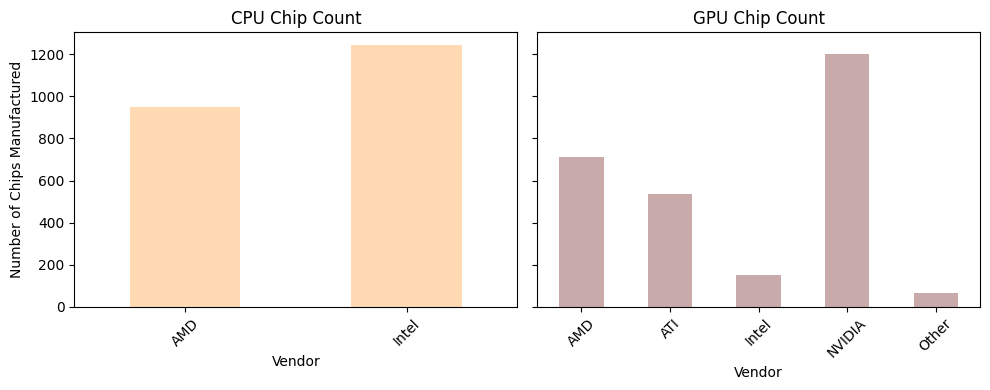

In [55]:
vendor_counts = df.groupby(['Vendor', 'Type']).size().unstack(fill_value=0)

cpu_vendors = vendor_counts.loc[vendor_counts.index.isin(['Intel', 'AMD'])]

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

cpu_vendors['CPU'].plot(kind='bar', ax=axes[0], color='#FFDAB3', title='CPU Chip Count')
axes[0].set_ylabel("Number of Chips Manufactured")
axes[0].set_xticklabels(cpu_vendors.index, rotation=45)

vendor_counts['GPU'].plot(kind='bar', ax=axes[1], color='#C8AAAA', title='GPU Chip Count')
axes[1].set_xticklabels(vendor_counts.index, rotation=45)

plt.tight_layout()
plt.show()


# Distribution of Data Overview

These Graphs provide an overview about the product count in each specification

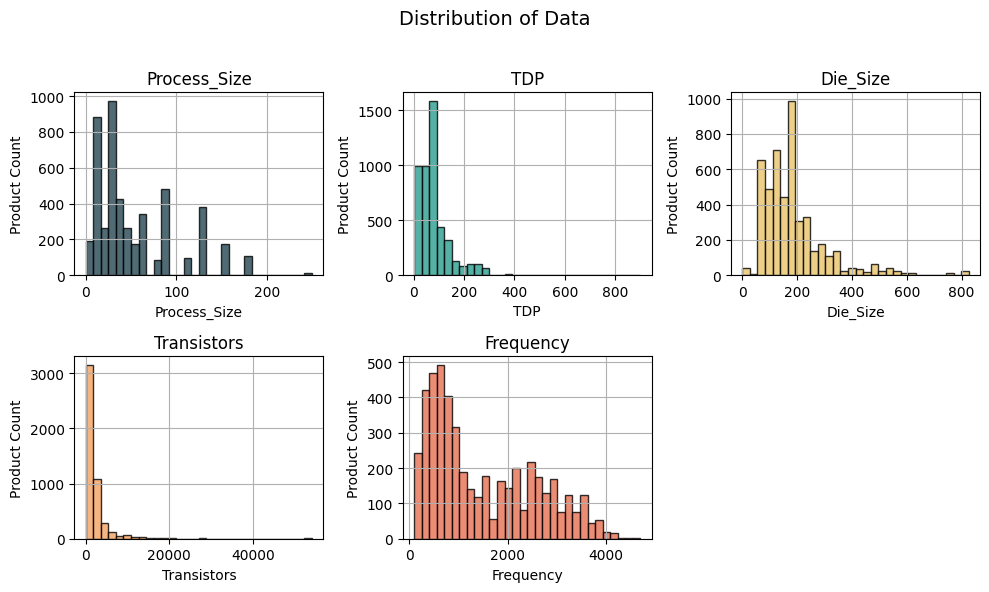

In [56]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

colors = ["#264653", "#2a9d8f", "#e9c46a", "#f4a261", "#e76f51"]

plt.figure(figsize=(10, 6))

for idx, col in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, idx + 1) 
    df[col].hist(bins=30, color=colors[idx % len(colors)], edgecolor="black", alpha=0.8)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Product Count")

plt.suptitle("Distribution of Data", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

# TDP Data Overview

This overview contains **Bar Graphs** that shows the products with the **Highest to Lowest TDP** and **Trend Charts** that shows **CPU & GPU TDP Trend** over the Years

C:\Users\flore\AppData\Local\Temp\ipykernel_14012\1518550203.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(lowest_tdp['Product'], rotation=45)
C:\Users\flore\AppData\Local\Temp\ipykernel_14012\1518550203.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(highest_tdp['Product'], rotation=45)


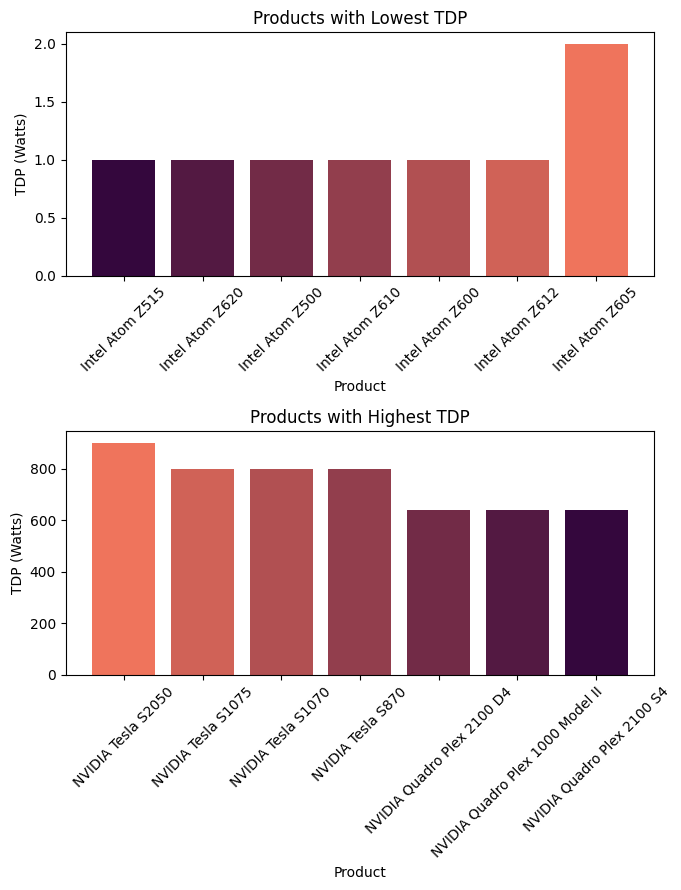

In [57]:
lowest_tdp = df.nsmallest(7, 'TDP')[['Product', 'TDP']]
highest_tdp = df.nlargest(7, 'TDP')[['Product', 'TDP']]
fig, axes = plt.subplots(2, 1, figsize=(7, 9))

axes[0].bar(lowest_tdp['Product'], lowest_tdp['TDP'], color=['#34073d','#531942','#722b47','#923e4d','#b15052','#d06257','#ef745c'])
axes[0].set_title("Products with Lowest TDP")
axes[0].set_ylabel("TDP (Watts)")
axes[0].set_xlabel("Product")
axes[0].set_xticklabels(lowest_tdp['Product'], rotation=45)

axes[1].bar(highest_tdp['Product'], highest_tdp['TDP'], color=['#ef745c','#d06257','#b15052','#923e4d','#722b47','#531942','#34073d'])
axes[1].set_title("Products with Highest TDP")
axes[1].set_ylabel("TDP (Watts)")
axes[1].set_xlabel("Product")
axes[1].set_xticklabels(highest_tdp['Product'], rotation=45)

plt.tight_layout()
plt.show()



# CPU and GPU TDP Trend Over the Years

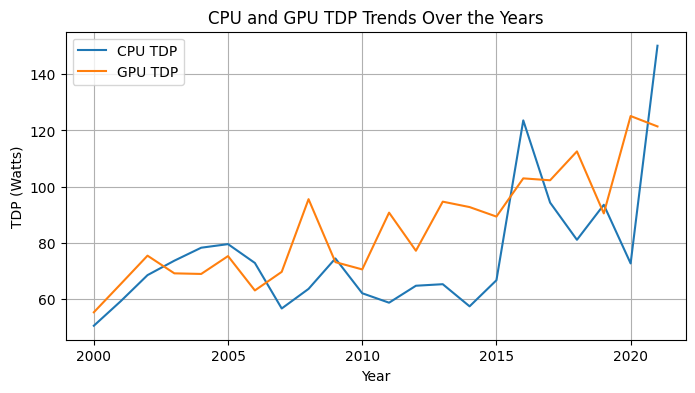

In [58]:
df["Year"] = pd.to_datetime(df["Date"], errors="coerce").dt.year

cpu_data = df[df["Type"] == "CPU"].groupby("Year")["TDP"].mean()
gpu_data = df[df["Type"] == "GPU"].groupby("Year")["TDP"].mean()

plt.figure(figsize=(8, 4))
plt.plot(cpu_data.index, cpu_data, label="CPU TDP")
plt.plot(gpu_data.index, gpu_data, label="GPU TDP")

plt.xlabel("Year")
plt.ylabel("TDP (Watts)")
plt.title("CPU and GPU TDP Trends Over the Years")
plt.legend()
plt.grid(True)

plt.show()

# Scatter Plot of TDP for all Products

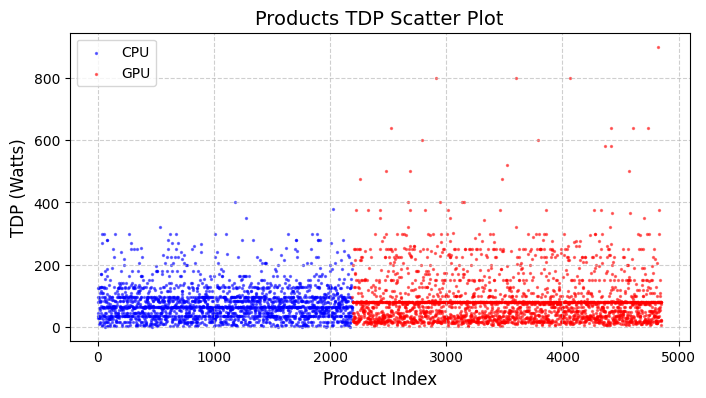

In [59]:
df = df.dropna(subset=["TDP"])

df = df.reset_index(drop=True)

cpu_data = df[df["Type"] == "CPU"]
gpu_data = df[df["Type"] == "GPU"]

plt.figure(figsize=(8, 4))
plt.scatter(cpu_data.index, cpu_data["TDP"], s=2, color="blue", alpha=0.5, label="CPU")
plt.scatter(gpu_data.index, gpu_data["TDP"], s=2, color="red", alpha=0.5, label="GPU")

plt.title("Products TDP Scatter Plot", fontsize=14)
plt.xlabel("Product Index", fontsize=12)
plt.ylabel("TDP (Watts)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

plt.legend()

plt.show()

# Process Size Data Overview

This overview contains **Bar Graphs** that shows the products with the **Highest to Lowest Process Sizes**, **Average Process Size by Type** and **Trend Charts** that shows **CPU & GPU Process Size Trend over the Years**

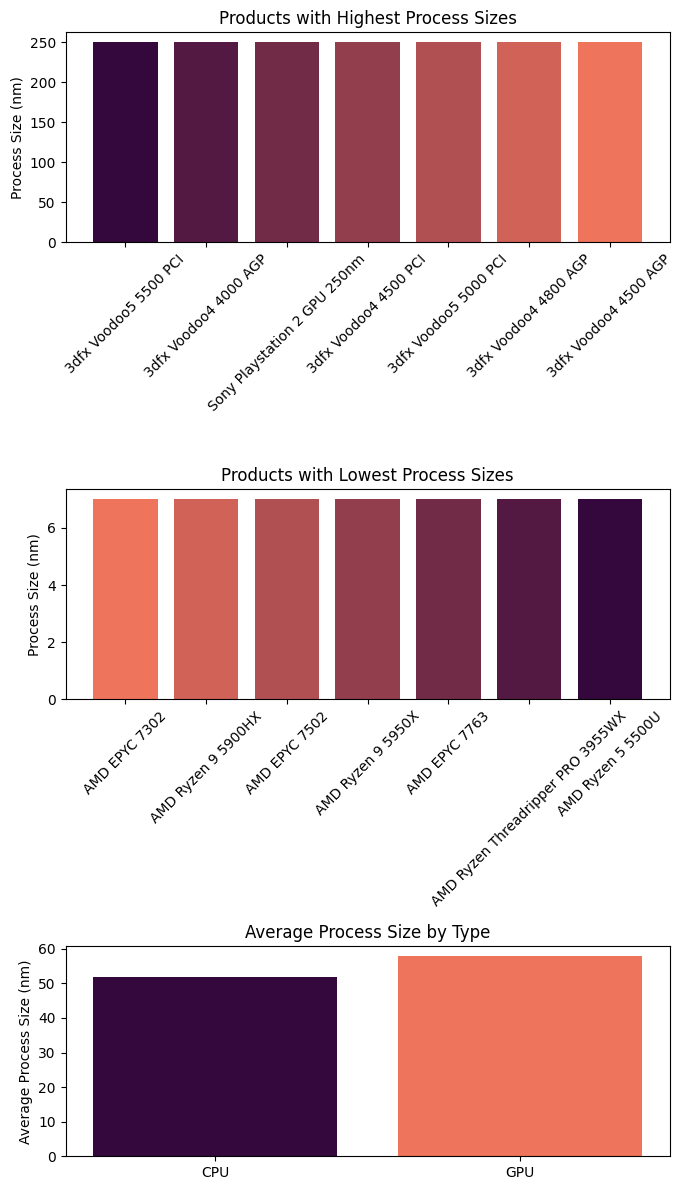

In [60]:
df = df.dropna(subset=["Date", "Process_Size", "Type", "Product"])
df = df[df["Process_Size"] > 0]

df["Year"] = pd.to_datetime(df["Date"], errors="coerce").dt.year

top_process_size = df.nlargest(7, "Process_Size")
bottom_process_size = df.nsmallest(7, "Process_Size")

fig, axs = plt.subplots(3, 1, figsize=(7, 12))

axs[0].bar(top_process_size["Product"], top_process_size["Process_Size"], color=['#34073d','#531942','#722b47','#923e4d','#b15052','#d06257','#ef745c'])
axs[0].set_ylabel("Process Size (nm)")
axs[0].set_title("Products with Highest Process Sizes")
axs[0].tick_params(axis='x', rotation=45)

axs[1].bar(bottom_process_size["Product"], bottom_process_size["Process_Size"], color=['#ef745c','#d06257','#b15052','#923e4d','#722b47','#531942','#34073d'])
axs[1].set_ylabel("Process Size (nm)")
axs[1].set_title("Products with Lowest Process Sizes")
axs[1].tick_params(axis='x', rotation=45)

average_process_size = df.groupby("Type")["Process_Size"].mean()
axs[2].bar(average_process_size.index, average_process_size.values, color=["#34073d", "#ef745c"])
axs[2].set_ylabel("Average Process Size (nm)")
axs[2].set_title("Average Process Size by Type")

plt.tight_layout()
plt.show()


# CPU and GPU Process Size Trend Over the Years

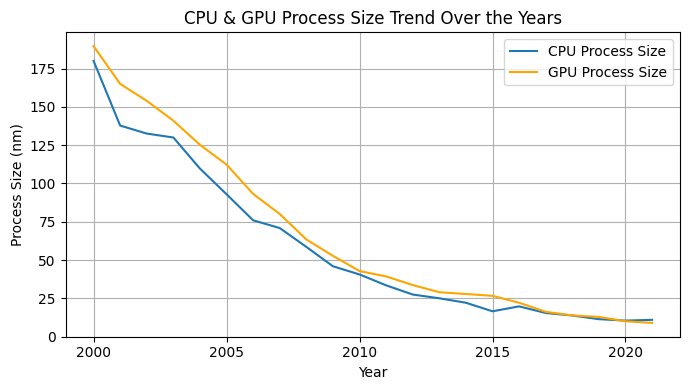

In [61]:
df = df.dropna(subset=["Date", "Process_Size", "Type", "Product"])
df = df[df["Process_Size"] > 0]

df["Year"] = pd.to_datetime(df["Date"], errors="coerce").dt.year

cpu_process_trend = df[df["Type"] == "CPU"].groupby("Year")["Process_Size"].mean()
gpu_process_trend = df[df["Type"] == "GPU"].groupby("Year")["Process_Size"].mean()

fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(cpu_process_trend.index, cpu_process_trend, label="CPU Process Size")
ax.plot(gpu_process_trend.index, gpu_process_trend, label="GPU Process Size", color='orange')

ax.set_xlabel("Year")
ax.set_ylabel("Process Size (nm)")
ax.set_title("CPU & GPU Process Size Trend Over the Years")
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

# Scatter Plot of Process Size for all Products

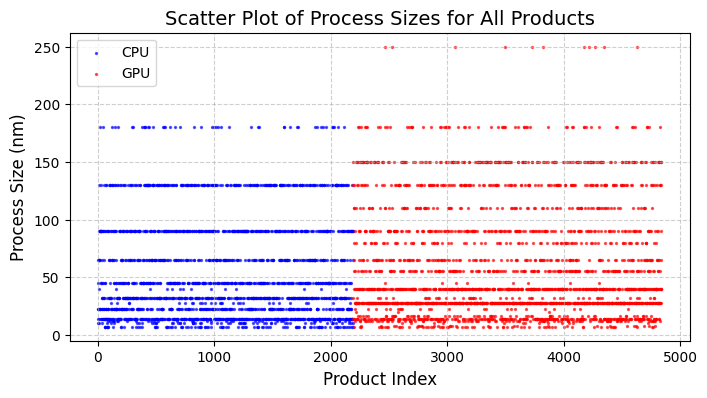

In [62]:
df = df.dropna(subset=["Process_Size"])

df = df.reset_index(drop=True)

cpu_data = df[df["Type"] == "CPU"]
gpu_data = df[df["Type"] == "GPU"]

plt.figure(figsize=(8, 4))
plt.scatter(cpu_data.index, cpu_data["Process_Size"], s=2, color="blue", alpha=0.6, label="CPU")
plt.scatter(gpu_data.index, gpu_data["Process_Size"], s=2, color="red", alpha=0.6, label="GPU")

plt.title("Scatter Plot of Process Sizes for All Products", fontsize=14)
plt.xlabel("Product Index", fontsize=12)
plt.ylabel("Process Size (nm)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()

plt.show()


# Die Size Data Overview

This overview contains **Bar Graphs** that shows the products with the **Highest to Lowest Die Sizes**, **Average Die Size by Type** and **Trend Charts** that shows **CPU & GPU Die Size Trend over the Years**

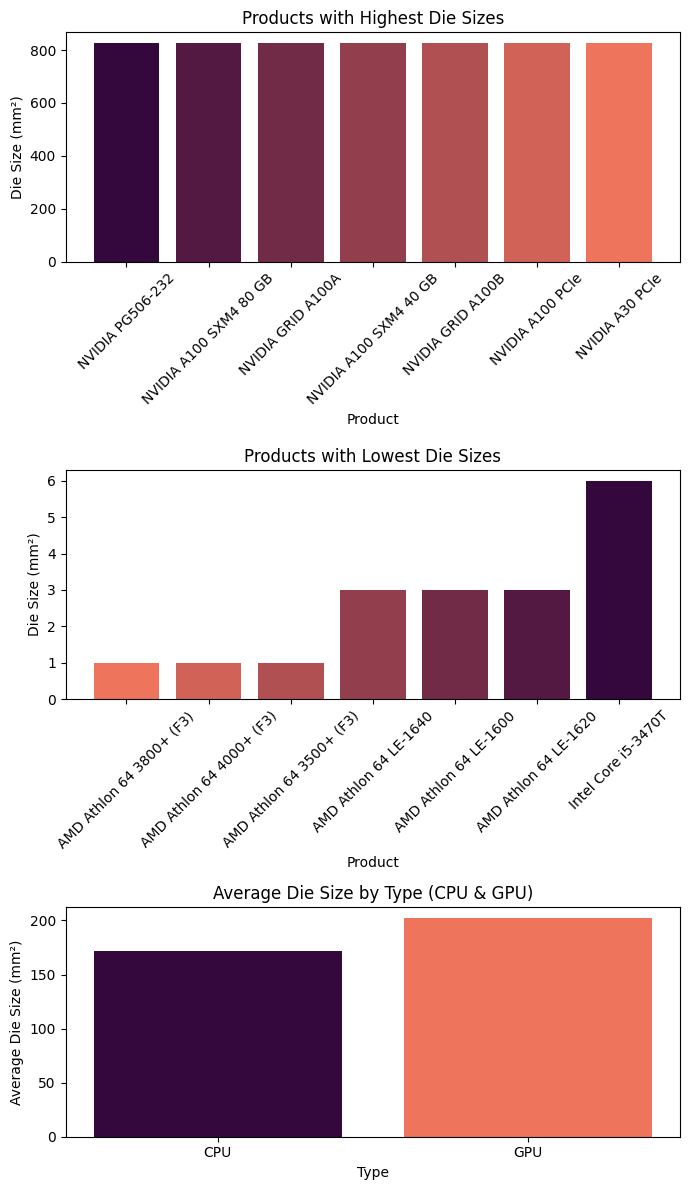

In [63]:
df = df.dropna(subset=['Die_Size'])

top_die_sizes = df.nlargest(7, 'Die_Size')
bottom_die_sizes = df.nsmallest(7, 'Die_Size')
avg_die_size_by_type = df.groupby("Type")["Die_Size"].mean()

fig, axes = plt.subplots(3, 1, figsize=(7, 12))

axes[0].bar(top_die_sizes["Product"], top_die_sizes["Die_Size"], color=['#34073d','#531942','#722b47','#923e4d','#b15052','#d06257','#ef745c'])
axes[0].set_ylabel("Die Size (mm²)")
axes[0].set_xlabel("Product")
axes[0].set_title("Products with Highest Die Sizes")
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(bottom_die_sizes["Product"], bottom_die_sizes["Die_Size"], color=['#ef745c','#d06257','#b15052','#923e4d','#722b47','#531942','#34073d'])
axes[1].set_ylabel("Die Size (mm²)")
axes[1].set_xlabel("Product")
axes[1].set_title("Products with Lowest Die Sizes")
axes[1].tick_params(axis='x', rotation=45)

axes[2].bar(avg_die_size_by_type.index, avg_die_size_by_type.values, color=["#34073d", "#ef745c"])
axes[2].set_ylabel("Average Die Size (mm²)")
axes[2].set_xlabel("Type")
axes[2].set_title("Average Die Size by Type (CPU & GPU)")

plt.tight_layout()
plt.show()


# CPU and GPU Die Size Trend Over the Years

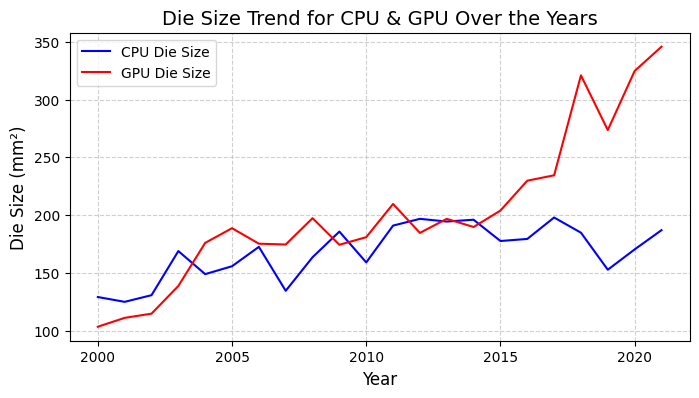

In [64]:
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
df["Year"] = df["Date"].dt.year
df = df.dropna(subset=["Year", "Die_Size"])
trend_data = df.groupby(["Year", "Type"])["Die_Size"].mean().unstack()

plt.figure(figsize=(8, 4))
plt.plot(trend_data.index, trend_data["CPU"], color="blue", label="CPU Die Size")
plt.plot(trend_data.index, trend_data["GPU"], color="red", label="GPU Die Size")
plt.title("Die Size Trend for CPU & GPU Over the Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Die Size (mm²)", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()


# Scatter Plot of Die Size for all Products

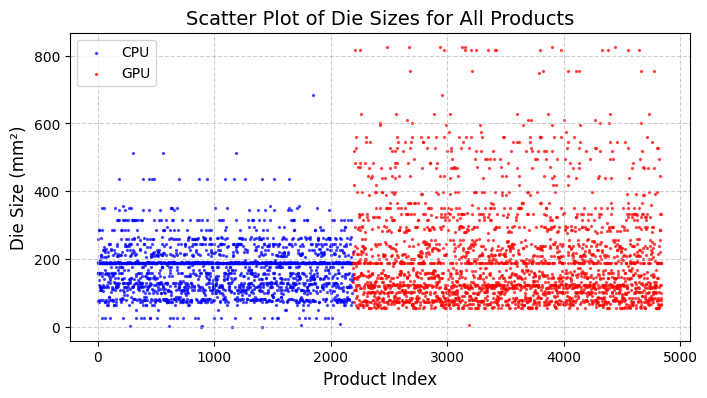

In [65]:
df = df.dropna(subset=["Die_Size"])

cpu_data = df[df["Type"] == "CPU"]
gpu_data = df[df["Type"] == "GPU"]

plt.figure(figsize=(8, 4))
plt.scatter(cpu_data.index, cpu_data["Die_Size"], s=2, color="blue", alpha=0.6, label="CPU")
plt.scatter(gpu_data.index, gpu_data["Die_Size"], s=2, color="red", alpha=0.6, label="GPU")

plt.title("Scatter Plot of Die Sizes for All Products", fontsize=14)
plt.xlabel("Product Index", fontsize=12)
plt.ylabel("Die Size (mm²)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()

plt.show()


# Transistor Count Data Overview

This overview contains **Bar Graphs** that shows the products with the **Highest to Lowest Transistor Count** and **Trend Charts** that shows **CPU & GPU Transistor Count Trend over the Years**

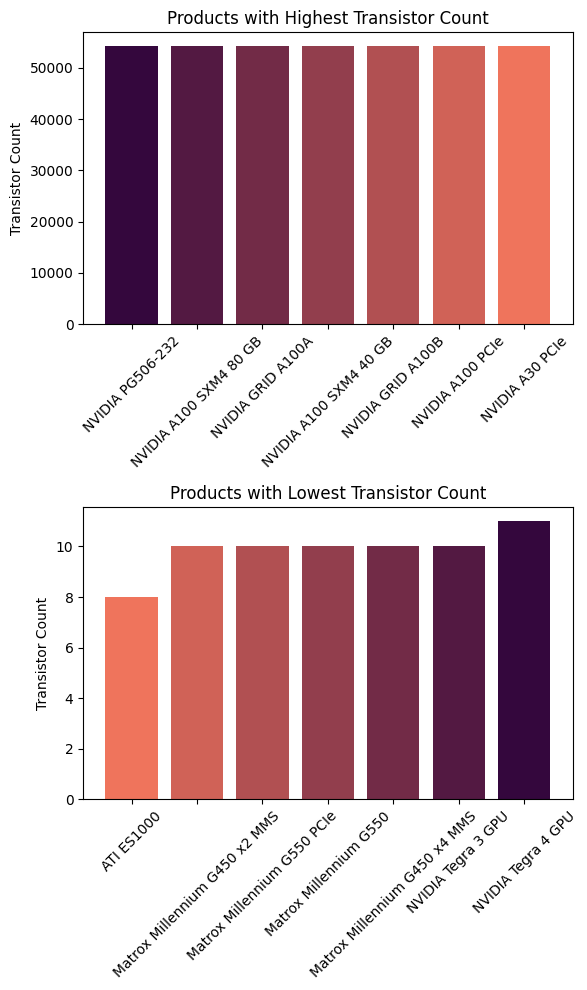

In [66]:
df_transistor = df[['Product', 'Type', 'Transistors']]

t_high = df_transistor.nlargest(7, 'Transistors')
t_low = df_transistor.nsmallest(7, 'Transistors')

fig, axes = plt.subplots(2, 1, figsize=(6, 10))

axes[0].bar(t_high['Product'], t_high['Transistors'], color=['#34073d','#531942','#722b47','#923e4d','#b15052','#d06257','#ef745c'])
axes[0].set_title('Products with Highest Transistor Count')
axes[0].set_ylabel('Transistor Count')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(t_low['Product'], t_low['Transistors'], color=['#ef745c','#d06257','#b15052','#923e4d','#722b47','#531942','#34073d'])
axes[1].set_title('Products with Lowest Transistor Count')
axes[1].set_ylabel('Transistor Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# CPU and GPU Transistor Count Trend Over the Years

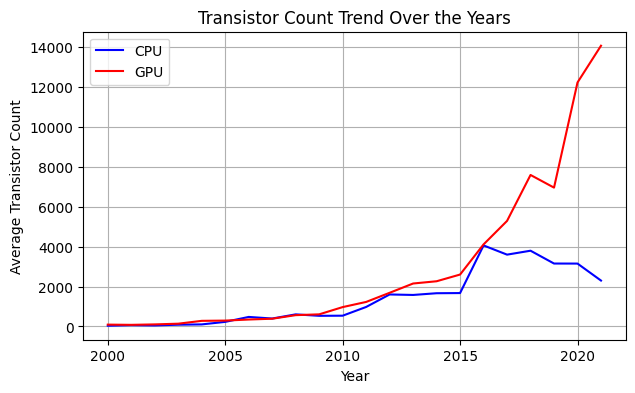

In [67]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])

df['Year'] = df['Date'].dt.year
df_trend = df.groupby(['Year', 'Type'])['Transistors'].mean().unstack()

fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(df_trend.index, df_trend['CPU'], label='CPU', color='blue')
ax.plot(df_trend.index, df_trend['GPU'], label='GPU', color='red')

ax.set_title('Transistor Count Trend Over the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Average Transistor Count')
ax.legend()
ax.grid(True)

plt.show()

# Scatter Plot of Transistor Count for all Products

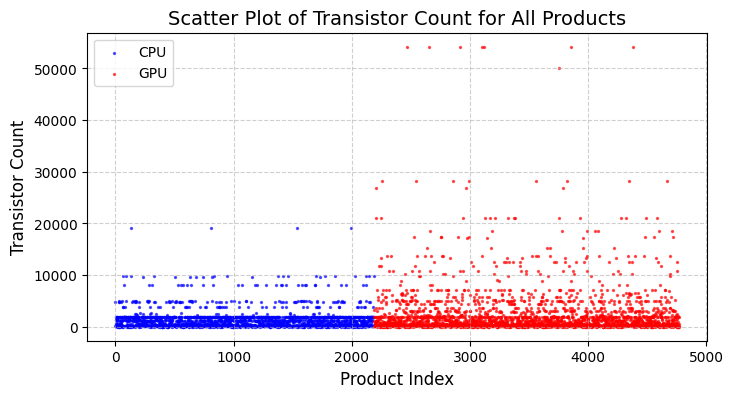

In [68]:
df = df.dropna(subset=["Transistors"])

df = df.reset_index(drop=True)

cpu_data = df[df["Type"] == "CPU"]
gpu_data = df[df["Type"] == "GPU"]

plt.figure(figsize=(8, 4))
plt.scatter(cpu_data.index, cpu_data["Transistors"], s=2, color="blue", alpha=0.6, label="CPU")
plt.scatter(gpu_data.index, gpu_data["Transistors"], s=2, color="red", alpha=0.6, label="GPU")

plt.title("Scatter Plot of Transistor Count for All Products", fontsize=14)
plt.xlabel("Product Index", fontsize=12)
plt.ylabel("Transistor Count", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()

plt.show()

# Frequency Data Overview

This overview shows the Products with the most **Efficiency (in terms of TDP)** and with the **Highest Base Frequency** by type (CPU & GPU)

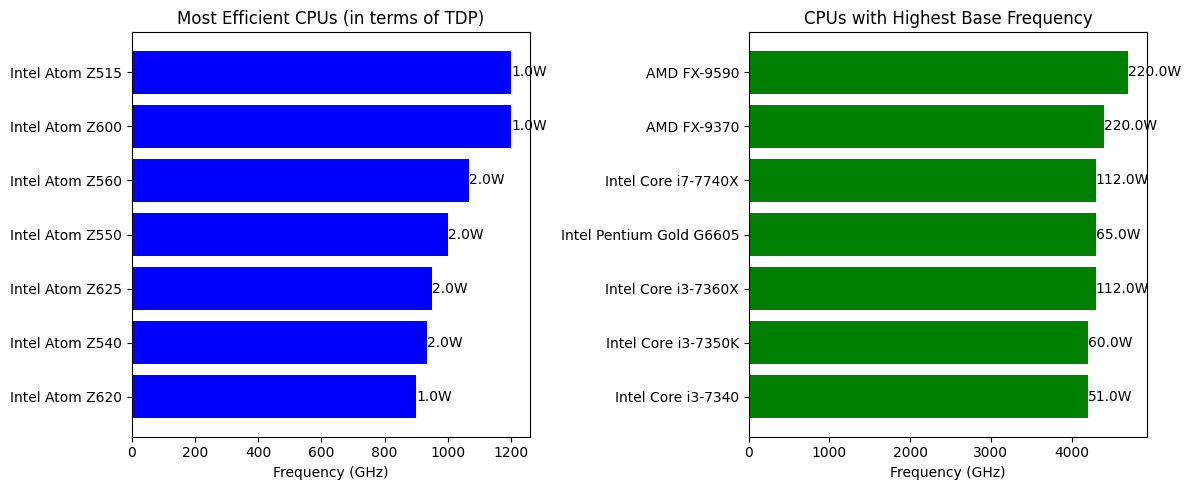

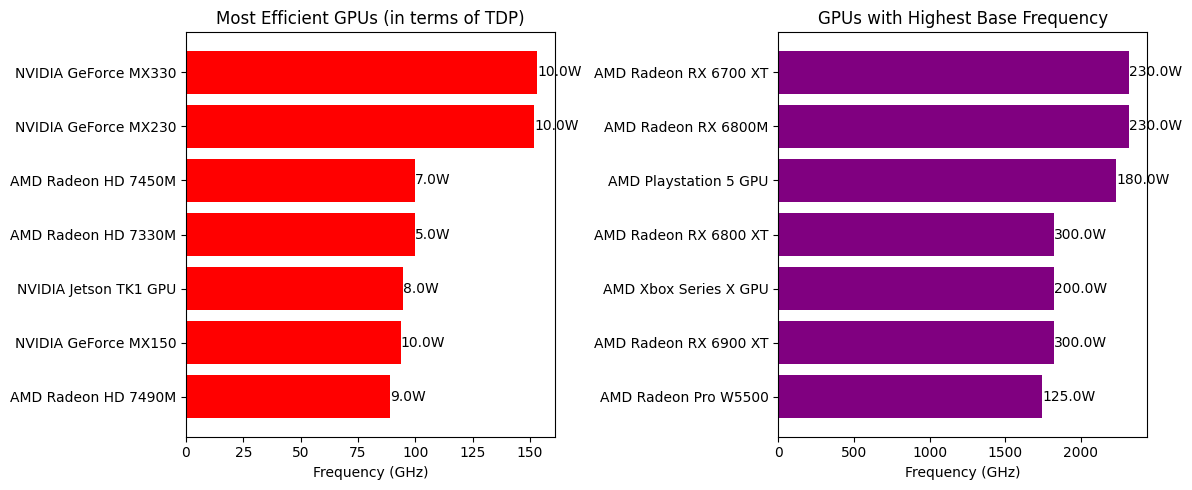

In [69]:
df = df.dropna(subset=["Frequency", "TDP"]).reset_index(drop=True)

cpu_data = df[df["Type"] == "CPU"]
gpu_data = df[df["Type"] == "GPU"]

cpu_efficient = cpu_data.assign(Efficiency=cpu_data["Frequency"] / cpu_data["TDP"]).nlargest(7, "Efficiency")
gpu_efficient = gpu_data.assign(Efficiency=gpu_data["Frequency"] / gpu_data["TDP"]).nlargest(7, "Efficiency")

cpu_highest_freq = cpu_data.nlargest(7, "Frequency")
gpu_highest_freq = gpu_data.nlargest(7, "Frequency")

def plot_bars(data1, data2, title1, title2, xlabel1, xlabel2, color1, color2):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].barh(data1["Product"], data1["Efficiency"], color=color1)
    axes[0].set_title(title1)
    axes[0].set_xlabel(xlabel1)
    axes[0].invert_yaxis()
    for i, (val, tdp) in enumerate(zip(data1["Efficiency"], data1["TDP"])):
        axes[0].text(val, i, f"{tdp}W", va='center')
    
    axes[1].barh(data2["Product"], data2["Frequency"], color=color2)
    axes[1].set_title(title2)
    axes[1].set_xlabel(xlabel2)
    axes[1].invert_yaxis()
    for i, (val, tdp) in enumerate(zip(data2["Frequency"], data2["TDP"])):
        axes[1].text(val, i, f"{tdp}W", va='center')
    
    plt.tight_layout()
    plt.show()

plot_bars(cpu_efficient, cpu_highest_freq, 
          "Most Efficient CPUs (in terms of TDP)", "CPUs with Highest Base Frequency", 
          "Frequency (GHz)", "Frequency (GHz)", "blue", "green")

plot_bars(gpu_efficient, gpu_highest_freq, 
          "Most Efficient GPUs (in terms of TDP)", "GPUs with Highest Base Frequency", 
          "Frequency (GHz)", "Frequency (GHz)", "red", "purple")